### source
### https://physionet.org/content/mitdb/1.0.0/

### beat tables
### https://archive.physionet.org/physiobank/database/html/mitdbdir/tables.htm#allbeats
====================

## ECG reference paper
### references : https://www.researchgate.net/figure/Mapping-the-MIT-BIH-Arrhythmia-types-to-the-AAMI-Classes_tbl1_267411759
### https://www.sciencedirect.com/science/article/pii/S0169260715003314
=====================

## info about 12 lead ECG.  MLII -> modified limb lead II
#### https://en.wikipedia.org/wiki/Electrocardiography
=====================

### sampling rate

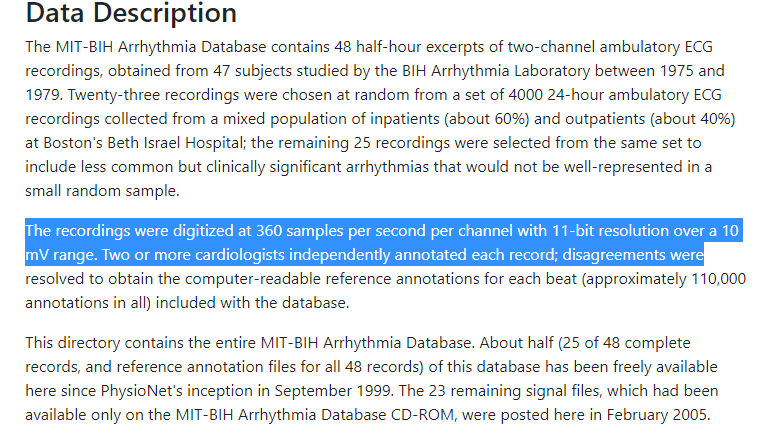

In [ ]:
### https://www.researchgate.net/post/Whats_the_Sampling_Period_of_the_ECG_signal_in_MIT-BIH_database

### annotation

https://archive.physionet.org/physiobank/annotations.shtml

In [1]:
import os
import wfdb as wf
import numpy as np
import pandas as pd
from glob import glob
from scipy import signal as ss
from matplotlib import pyplot as plt
from biosppy.signals import ecg

In [2]:
def get_records():
    """ Get paths for data in data/mit/ directory """
    # There are 3 files for each record
    # *.atr is one of them
    paths = glob('C:/Users/mbl-mavoly/py/ECGsignal/mitdb/*.atr')

    # Get rid of the extension
    paths = [path[:-4] for path in paths]
    paths.sort()

    return paths

In [18]:
records = np.transpose(get_records())
for i,val in enumerate(np.transpose(get_records())): 
    print(str(i)+" "+val)
    
print('Total record :'+str(len(records)))

0 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\100
1 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\101
2 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\102
3 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\103
4 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\104
5 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\105
6 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\106
7 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\107
8 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\108
9 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\109
10 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\111
11 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\112
12 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\113
13 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\114
14 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\115
15 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\116
16 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\117
17 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\118
18 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\119
19 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\121
20 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\122
21 C:/Users/mbl-mavoly/py/ECGsignal/mitdb\12

In [39]:
# Patient All meta data
for path in records:
    print('Loading file:', path)

    # Read in the data
    record = wf.rdsamp(path)
    annotation = wf.rdann(path, 'atr')
    
    print(record[1]) # print all meta data
    print('Channel name : '+str(record[1]['sig_name']))
    print('Channel unit : '+str(record[1]['units']))
    print('sampling rate : '+ str(record[1]['fs']))
    print()

Loading file: C:/Users/mbl-mavoly/py/ECGsignal/mitdb\100
{'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'base_time': None, 'units': ['mV', 'mV'], 'sig_len': 650000, 'base_date': None, 'fs': 360, 'n_sig': 2, 'sig_name': ['MLII', 'V5']}
Channel name : ['MLII', 'V5']
Channel unit : ['mV', 'mV']
sampling rate : 360

Loading file: C:/Users/mbl-mavoly/py/ECGsignal/mitdb\101
{'comments': ['75 F 1011 654 x1', 'Diapres'], 'base_time': None, 'units': ['mV', 'mV'], 'sig_len': 650000, 'base_date': None, 'fs': 360, 'n_sig': 2, 'sig_name': ['MLII', 'V1']}
Channel name : ['MLII', 'V1']
Channel unit : ['mV', 'mV']
sampling rate : 360

Loading file: C:/Users/mbl-mavoly/py/ECGsignal/mitdb\102
{'comments': ['84 F 1525 167 x1', 'Digoxin', 'The rhythm is paced with a demand pacemaker.  The PVCs are multiform.'], 'base_time': None, 'units': ['mV', 'mV'], 'sig_len': 650000, 'base_date': None, 'fs': 360, 'n_sig': 2, 'sig_name': ['V5', 'V2']}
Channel name : ['V5', 'V2']
Channel unit : ['mV', 'mV']
sam

{'comments': ['68 M 1960 2851 x1', 'Digoxin, Hydrochlorthiazide, Inderal, KCl', 'The PVCs are uniform and late-cycle.  Junctional escape beats occur following', 'episodes of ventricular trigeminy.'], 'base_time': None, 'units': ['mV', 'mV'], 'sig_len': 650000, 'base_date': None, 'fs': 360, 'n_sig': 2, 'sig_name': ['MLII', 'V1']}
Channel name : ['MLII', 'V1']
Channel unit : ['mV', 'mV']
sampling rate : 360

Loading file: C:/Users/mbl-mavoly/py/ECGsignal/mitdb\202
{'comments': ['68 M 1960 2851 x1', 'Digoxin, Hydrochlorthiazide, Inderal, KCl', 'The PVCs are uniform and late-cycle.  This record was taken from the same', 'analog tape as record 201.'], 'base_time': None, 'units': ['mV', 'mV'], 'sig_len': 650000, 'base_date': None, 'fs': 360, 'n_sig': 2, 'sig_name': ['MLII', 'V1']}
Channel name : ['MLII', 'V1']
Channel unit : ['mV', 'mV']
sampling rate : 360

Loading file: C:/Users/mbl-mavoly/py/ECGsignal/mitdb\203
{'comments': ['43 M 1878 356 x1', 'Coumadin, Digoxin, Heparin, Hygroton, Lasix

{'comments': ['72 F 2009 2851 x2', 'None', 'AV conduction is quite abnormal with periods of 2:1 AV block, examples', 'of Mobitz II block, and right bundle branch block which appears to be', 'rate-related.  The couplet is probably ventricular.'], 'base_time': None, 'units': ['mV', 'mV'], 'sig_len': 650000, 'base_date': None, 'fs': 360, 'n_sig': 2, 'sig_name': ['MLII', 'V1']}
Channel name : ['MLII', 'V1']
Channel unit : ['mV', 'mV']
sampling rate : 360

Loading file: C:/Users/mbl-mavoly/py/ECGsignal/mitdb\232
{'comments': ['76 F 2777 3655 x2', 'Aldomet, Inderal', 'The rhythm is compatible with sick sinus syndrome.  There is underlying', 'sinus bradycardia, first degree AV block, and frequent ectopic atrial runs', 'at rates of 80 to 90 bpm.  There are numerous long pauses up to 6 seconds', 'in duration.'], 'base_time': None, 'units': ['mV', 'mV'], 'sig_len': 650000, 'base_date': None, 'fs': 360, 'n_sig': 2, 'sig_name': ['MLII', 'V1']}
Channel name : ['MLII', 'V1']
Channel unit : ['mV', 'm

In [37]:
# channel list
# Extract Channel name
temp_chname = list()
for path in records[:]:
    record = wf.rdsamp(path)
    for i in range(0,len(record[1]['sig_name'])):
        temp_chname.append(record[1]['sig_name'][1])
    #print(record[1]['sig_name'])
    
temp_chname = list(set(temp_chname))
print("Channel List ")
print(temp_chname)

Channel List 
['V4', 'V1', 'MLII', 'V5', 'V2']


<b>categorize patient with channel combine</b>

In [35]:

channel_patient = list()
for i in range(0,len(temp_chname)):
    channel_patient.append(list())
    

totalChan = len(temp_chname);
for path in records[:]:
    record = wf.rdsamp(path)
    for i in range(0,totalChan):
        #print(str(record[1]['sig_name'][0])+' '+temp_chname[i])
        if(temp_chname[i] == record[1]['sig_name'][0]):
            channel_patient[i].append(path[-3:])
        if(temp_chname[i] == record[1]['sig_name'][1]):
            channel_patient[i].append(path[-3:])

total_check = 0;
for i in range(0,totalChan):
    print(temp_chname[i])
    print(channel_patient[i])
    print("Count patient in Channel :"+str(len(channel_patient[i])))
    total_check += len(channel_patient[i])
    print()

print("Total patient :"+str(total_check/2)) # 1 patient have 2 channel
print("Total patient x Total Channel :"+str(total_check)) # 1 patient have 2 channel

V4
['124']
Count patient in Channel :1

V1
['101', '105', '106', '107', '108', '109', '111', '112', '113', '115', '116', '118', '119', '121', '122', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
Count patient in Channel :40

MLII
['100', '101', '103', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
Count patient in Channel :46

V5
['100', '102', '104', '114', '123']
Count patient in Channel :5

V2
['102', '103', '104', '117']
Count patient in Channel :4

Total patient :48.0
Total patient x Total Channel :96


<b>Categorize patient with channel divide between patient 100 and 200</b>

In [51]:
# categorize patient with channel divide between patient 100 and 200
channel_patient_100 = list() # patient with code 100-199
for i in range(0,len(temp_chname)):
    channel_patient_100 .append(list())
channel_patient_200 = list() # patient with code 200-299
for i in range(0,len(temp_chname)):
    channel_patient_200.append(list())
    

totalChan = len(temp_chname);
for path in records[:]:
    record = wf.rdsamp(path)
    for i in range(0,totalChan):
        if(int(path[-3:]) >= 200):
                        #print(str(record[1]['sig_name'][0])+' '+temp_chname[i])
            if(temp_chname[i] == record[1]['sig_name'][0]):
                channel_patient_200[i].append(path[-3:])
            if(temp_chname[i] == record[1]['sig_name'][1]):
                channel_patient_200[i].append(path[-3:])
        else:  
            #print(str(record[1]['sig_name'][0])+' '+temp_chname[i])
            if(temp_chname[i] == record[1]['sig_name'][0]):
                channel_patient_100[i].append(path[-3:])
            if(temp_chname[i] == record[1]['sig_name'][1]):
                channel_patient_100[i].append(path[-3:])

total_check = 0;
for i in range(0,totalChan):
    print("#### "+temp_chname[i])
    print("= id 100 = | Count patient in Channel: "+str(len(channel_patient_100[i])))
    print(channel_patient_100[i])
    print()
    total_check += len(channel_patient_100[i])
    print("= id 200 = | Count patient in Channel: "+str(len(channel_patient_200[i])))
    print(channel_patient_200[i])
    
    total_check += len(channel_patient_200[i])
    print()
print("Total patient : "+str(total_check/2)) # 1 patient have 2 channel
print("Total patient x Total Channel :"+str(total_check)) # 1 patient have 2 channel


#### V4
= id 100 = | Count patient in Channel: 1
['124']

= id 200 = | Count patient in Channel: 0
[]

#### V1
= id 100 = | Count patient in Channel: 15
['101', '105', '106', '107', '108', '109', '111', '112', '113', '115', '116', '118', '119', '121', '122']

= id 200 = | Count patient in Channel: 25
['200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']

#### MLII
= id 100 = | Count patient in Channel: 21
['100', '101', '103', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124']

= id 200 = | Count patient in Channel: 25
['200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']

#### V5
= id 100 = | Count patient in Channel: 5
['100', '102', '104', '114', '123']

= id 200 = | Co

In [ ]:
# tambah count per classnya all detail
# count per class AAMI